In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

### Unhnown target function: $f(x) = Sin(\pi x)$

In [2]:
def fx(x):
    return np.sin(np.pi * x)

### Training examples: $N=2$

# 3.1 
* _Hypothesis setⅠ_ : $h(x)=b$
* x_value:
* fx_value: 训练样本的集合
* H0_list: 每份训练样本对应的final hypothesis 的集合

In [3]:
D = 100
H0_list = []
fx_value = []
x_value = []
for i in range(D):
    x = 2 * np.random.rand(2) - 1
    y = fx(x)
    H0 = (y[0] + y[1]) / 2
    x_value.append(x)
    fx_value.append(y)
    H0_list.append(H0)

* H0_value: final hypothesis 对训练样本的预测结果

In [4]:
x_value = np.array(x_value)
fx_value = np.array(fx_value)
H0_value = np.array(H0_list)

* 假设的均值：$\bar H_0$

In [5]:
_H0 = np.mean(H0_value)
print("Bar H0 : y = b ---> y = {:.3f}".format(_H0))

Bar H0 : y = b ---> y = -0.051


* Bias$(H_0): \quad E_x((\bar H_0 - f(x))^2)$

In [6]:
Bias_H0 = np.mean((_H0 - fx_value) ** 2)
print("Bias(H0): {:.3f}".format(Bias_H0))

Bias(H0): 0.463


* Var$(H_0): \quad E_x((H_0-\bar H_0)^2)$

In [7]:
Var_H0 = np.mean((H0_value - _H0) ** 2)
print("Var(H0): {:.3f}".format(Var_H0))

Var(H0): 0.222


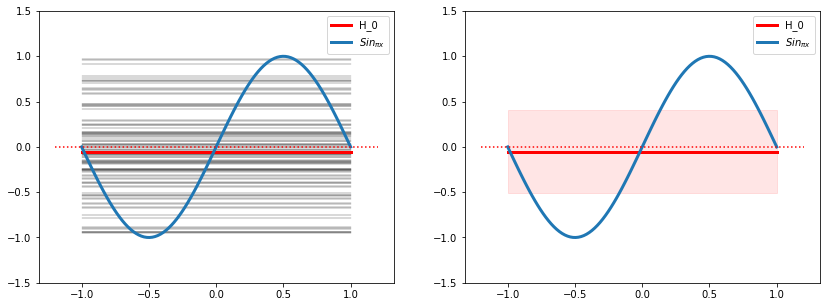

In [8]:
plt.figure(figsize=(14, 5))
plt.subplot(121)
for i in H0_value:
    plt.plot([-1, 1], [i, i], "k", linewidth=0.3)
#H0_var.append(get_square(i)[0])

plt.plot([-1, 1], [_H0, _H0], "r", linewidth=3, label="H_0")
plt.plot(np.linspace(-1, 1, 100), fx(np.linspace(-1, 1, 100)), linewidth=3, label="$Sin_{\pi x}$")
plt.plot([-1.2, 1.2], [0, 0], ":r")
plt.ylim(-1.5, 1.5)
plt.legend(loc=0)

plt.subplot(122)
plt.plot([-1, 1], [_H0, _H0], "r", linewidth=3, label="H_0")
plt.fill_between([-1, 1], _H0 - Bias_H0, _H0 + Bias_H0, alpha=0.1, color="r")
plt.plot(np.linspace(-1, 1, 100), fx(np.linspace(-1, 1, 100)), linewidth=3, label="$Sin_{\pi x}$")
plt.plot([-1.2, 1.2], [0, 0], ":r")
plt.ylim(-1.5, 1.5)
plt.legend(loc=0)
plt.show()

# 3.2 
* _Hypothesis setⅡ_: $h(x)=ax+b$

In [9]:
def get_k_and_b(x, y):
    k = (y[:, 1] - y[:, 0]) / (x[:, 1] - x[:, 0])
    b = y[:, 1] - k*x[:, 1]
    return np.c_[k, b]

* H1_list: final hypothesis 的集合

In [10]:
H1_list = get_k_and_b(x_value, fx_value)

* 假设集的均值：$\bar H_1$

In [11]:
_H1 = np.mean(H1_list, 0)
print("Bar H1 : y = kx + b ---> y = {:.3f}x + {:.3f}b".format(_H1[0], _H1[1]))

Bar H1 : y = kx + b ---> y = 0.746x + -0.110b


* _H1_value: 假设集的均值$\bar H_1$对训练样本的预测结果

In [12]:
_H1_value = np.c_[(_H1[0] * x_value[:, 0] + _H1[1] * x_value[:, 0]), 
                  (_H1[0] * x_value[:, 1] + _H1[1] * x_value[:, 1])]

* Bias$(H_1): \quad E_x((\bar H_1 - f(x))^2)$

In [13]:
Bias_H1 = np.mean((_H1_value - fx_value) ** 2)
print("Bias(H0): {:.3f}".format(Bias_H1))

Bias(H0): 0.217


* Var$(H_1): \quad E_x((H_1-\bar H_1)^2)$

In [14]:
Var_H1 = np.mean((H1_list - _H1) ** 2)
print("Var(H1): {:.3f}".format(Var_H1))

Var(H1): 1.395


In [15]:
Bias = []
for i in H1_list:
    H1_i_value = np.c_[(i[0] * x_value[:, 0] + i[1] * x_value[:, 0]), 
                  (i[0] * x_value[:, 1] + i[1] * x_value[:, 1])]
    Bias_i_H1 = np.mean((H1_i_value - fx_value) ** 2)
    Bias.append(Bias_i_H1)

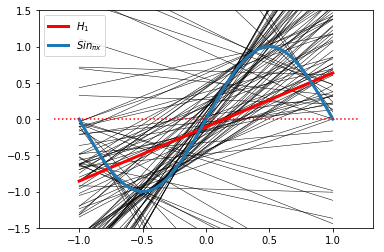

In [16]:
for i in range(D):
    plt.plot([-1, 1], [-1 * H1_list[i][0] + H1_list[i][1], 1 * H1_list[i][0] + H1_list[i][1]], "k", linewidth=0.5)

plt.plot([-1, 1], [-1 * _H1[0] + _H1[1], 1 * _H1[0] + _H1[1]], "r", linewidth=3, label="${H_1}$")
plt.plot(np.linspace(-1, 1, 100), fx(np.linspace(-1, 1, 100)), linewidth=3, label="$Sin_{\pi x}$")
plt.plot([-1.2, 1.2], [0, 0], ":r")
plt.ylim(-1.5, 1.5)
plt.legend(loc=0)
plt.show()